        1.import requried libraries :

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

        2.store the dataset in dataframe :   

In [79]:

df = pd.read_csv('sport_plan_dataset.csv')
df.head()




,age,tall,weight,main_goal,physical_level,sport_plan_id
0,22,163,78,fitness,beginner,1
1,47,199,87,weight loss,intermediate,2
2,50,189,75,muscle building,beginner,6
3,45,170,82,weight loss,advanced,4
4,60,176,88,weight loss,beginner,8


        3. Exploratory Data Analysis (EDA):
  

here we are going to explore our data to getting know what is the preprosseccing that we need to do .

3.1 Get general information about our data:

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1004 non-null   int64 
 1   tall            1004 non-null   int64 
 2   weight          1004 non-null   int64 
 3   main_goal       1004 non-null   object
 4   physical_level  1004 non-null   object
 5   sport_plan_id   1004 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.2+ KB


        3.2 Get some statistical Descriptions about our data :

In [81]:
df.describe(include='all')

,age,tall,weight,main_goal,physical_level,sport_plan_id
count,1004.000000,1004.000000,1004.000000,1004,1004,1004.000000
unique,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,NaN,fitness,beginner,NaN
freq,NaN,NaN,NaN,346,340,NaN
mean,38.493028,174.463147,84.666335,NaN,NaN,4.500000
std,12.945046,14.857235,20.450490,NaN,NaN,2.288077
min,18.000000,111.000000,35.000000,NaN,NaN,1.000000
25%,27.000000,162.000000,67.000000,NaN,NaN,3.000000
50%,38.000000,175.000000,85.000000,NaN,NaN,5.000000
75%,50.000000,186.000000,102.000000,NaN,NaN,6.000000


        3.3 determine if there is duplicated recordes or not :

In [82]:
print(df.duplicated().sum())

0


        3.4 determine if the dataset is balanced or not :

In [83]:
df["sport_plan_id"].value_counts()

sport_plan_id
6    127
5    127
3    126
1    125
2    125
4    125
8    125
7    124
Name: count, dtype: int64

        3.4 Determine if there is outliers in data or not :

<Axes: xlabel='sport_plan_id', ylabel='age'>

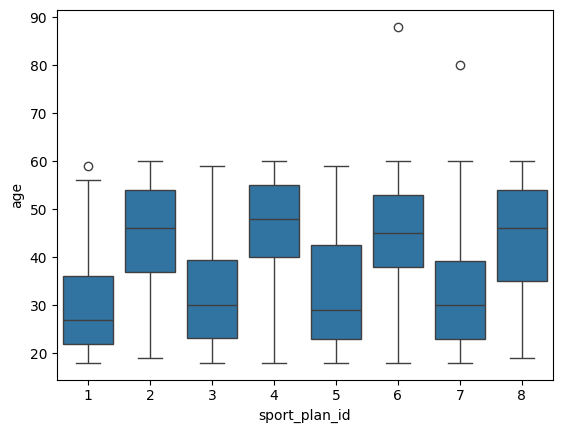

In [84]:

sns.boxplot(data=df,x='sport_plan_id',y='age')





<Axes: xlabel='sport_plan_id', ylabel='tall'>

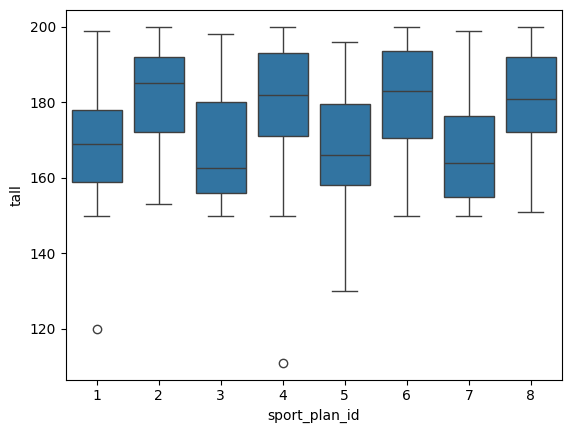

In [85]:
sns.boxplot(data=df,x='sport_plan_id',y='tall')


<Axes: xlabel='sport_plan_id', ylabel='weight'>

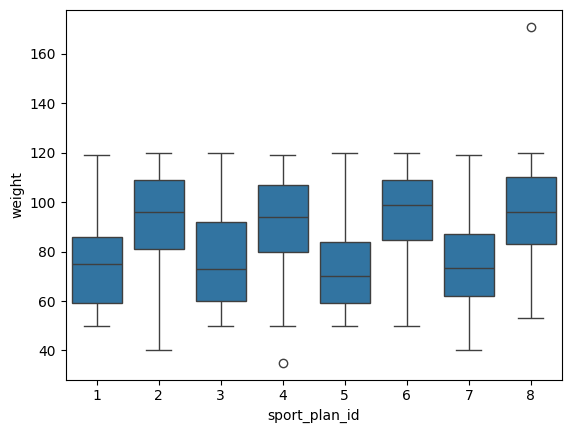

In [86]:
sns.boxplot(data=df,x='sport_plan_id',y='weight')

                4.Preproccessing :
after we explore our dataset , we will apply some opertions on it to make ready to the machine learning algorithm :

        4.1  Data Cleaning :

    4.1.1 Remove Outlires (Bining):

In [87]:
# df.sort_values('Age',inplace=True)
# df['Age'] = pd.qcut(df['Age'],q=3, labels=[0, 1,2]).astype('int64')
# df['Age']=df['Age'].astype('int64')
df.sort_values('age',inplace=True)
df['age'] = pd.cut(df['age'],bins=3, labels=[1, 2, 3])
df.sort_values('tall',inplace=True)
df['tall'] = pd.cut(df['tall'],bins=3, labels=[1, 2, 3])
df.sort_values('weight',inplace=True)
df['weight'] = pd.cut(df['weight'],bins=3, labels=[1, 2, 3])
df.head(25)
# df["main_goal"].replace({'muscle building':0,'fitness':1,'weight loss':2},inplace=True)
# df["physical_level"].replace({'beginner':0,'intermediate':1,'advanced':2},inplace=True)





,age,tall,weight,main_goal,physical_level,sport_plan_id
583,2,2,1,fitness,intermediate,4
553,1,3,1,weight loss,intermediate,2
573,2,2,1,muscle building,intermediate,7
415,1,2,1,fitness,intermediate,3
756,1,3,1,fitness,intermediate,3
721,2,3,1,weight loss,beginner,7
328,1,3,1,fitness,advanced,5
878,2,2,1,weight loss,advanced,3
290,1,3,1,muscle building,advanced,1
560,1,2,1,fitness,advanced,5


4.2 Data Transformation :
 we will transform "main goal" &"physical_level" features from categoriecal attributes to integer attributes :

In [88]:
df["main_goal"]= df["main_goal"].replace({'weight loss':1,'fitness':2,'muscle building':3})
df["physical_level"]= df["physical_level"].replace({'beginner':1,'intermediate':2,'advanced':3})
df.head()

C:\Users\KHEDR\AppData\Local\Temp\ipykernel_7404\2866027729.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["main_goal"]= df["main_goal"].replace({'weight loss':1,'fitness':2,'muscle building':3})
C:\Users\KHEDR\AppData\Local\Temp\ipykernel_7404\2866027729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["physical_level"]= df["physical_level"].replace({'beginner':1,'intermediate':2,'advanced':3})


,age,tall,weight,main_goal,physical_level,sport_plan_id
583,2,2,1,2,2,4
553,1,3,1,1,2,2
573,2,2,1,3,2,7
415,1,2,1,2,2,3
756,1,3,1,2,2,3


5.Fitting the Model:

5.1 find the best parameters to  fit the DecisionTree model :

In [89]:
X = df.drop(labels=['sport_plan_id'], axis=1)
y = df["sport_plan_id"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)
rf_grid = {
"max_depth": [1,2,3,4,5,6,7,8,9,10],
"min_samples_split": np.arange(2, 20, 2),
"criterion": ['gini','entropy'] }
rf_gs = GridSearchCV(DecisionTreeClassifier(),param_grid=rf_grid, cv=5)
rf_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])})

In [90]:
rf_gs.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}

5.2 Fitting the model based on parametes from last step:

In [91]:
model=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

6. Evalute the model :

In [92]:

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.88      0.77      0.82        30
           2       0.77      0.88      0.82        26
           3       0.92      0.71      0.80        17
           4       0.81      0.95      0.88        22
           5       1.00      0.88      0.93        32
           6       0.85      1.00      0.92        22
           7       0.92      0.88      0.90        25
           8       0.89      0.93      0.91        27

    accuracy                           0.88       201
   macro avg       0.88      0.87      0.87       201
weighted avg       0.88      0.88      0.88       201



In [93]:
print(accuracy_score(y_test,model.predict(x_test)))

0.8756218905472637


In [94]:
roc_auc_score(y_test,model.predict_proba(x_test),multi_class='ovo')

0.9880365813040445

<Axes: >

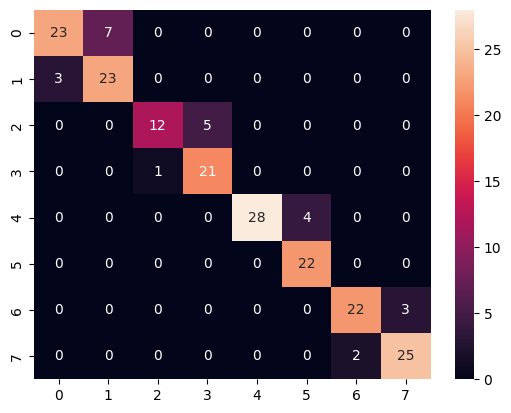

In [96]:
conf_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(conf_matrix, annot=True)

7. Save the model in pickle file :

since we will use it in the server side for predaction :

In [97]:
import pickle

# Train and fit your Decision Trees model
# decision_tree_model.fit(X_train, y_train)

# Save the model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)